In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from sklearn.model_selection import train_test_split
import random
import pandas as pd

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
image = np.asarray(df['Pixels'])
y_train = np.asarray(df['Emotion'])

## Data Preprocessing

In [4]:
X_train = []
for i in range(np.shape(image)[0]):
    im = image[i]
    im = im.split(' ')
    im = np.asarray(im)
    X_train.append(im.reshape(48, 48))

In [5]:
X_train = np.asarray(X_train, dtype = float)
print(X_train.shape)
print(y_train.shape)

(4178, 48, 48)
(4178,)


3


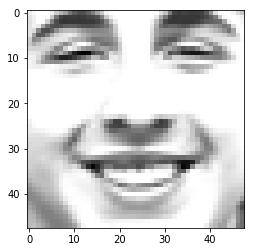

In [6]:
x = random.randint(0, np.shape(image)[0])
q = np.asarray(X_train[x], dtype=float)
print(y_train[x])
plt.imshow(q, cmap = plt.get_cmap("gray"))

In [7]:
#label = label.reshape(4178, 1)
num_classes = 7
y_train = to_categorical(y_train, 7)

In [8]:
print(X_train.shape)

(4178, 48, 48)


In [9]:
X_train = X_train/255

In [10]:
X_train = X_train.reshape(4178, 48, 48, 1)

## Neural Network

In [11]:
def neural_model():
    model = Sequential()
    model.add(Conv2D(15, (5, 5), input_shape = (48, 48, 1), activation = 'relu'))
    model.add(AveragePooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (5, 5), input_shape = (48, 48, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(10, (3, 3), activation = 'relu'))
    #model.add(Conv2D(30, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    #model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [12]:
model = neural_model()
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fb5a7c9c400>>

In [13]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3, batch_size = 50, verbose = 1, shuffle = True )

Train on 2924 samples, validate on 1254 samples
Epoch 1/50
2924/2924 [==============================] - 5s 2ms/step - loss: 1.8852 - acc: 0.2548 - val_loss: 1.8545 - val_acc: 0.2927
Epoch 2/50
2924/2924 [==============================] - 5s 2ms/step - loss: 1.8614 - acc: 0.2856 - val_loss: 1.8614 - val_acc: 0.2927
Epoch 3/50
2924/2924 [==============================] - 5s 2ms/step - loss: 1.8536 - acc: 0.2856 - val_loss: 1.8606 - val_acc: 0.2927
Epoch 4/50
2924/2924 [==============================] - 5s 2ms/step - loss: 1.8585 - acc: 0.2856 - val_loss: 1.8456 - val_acc: 0.2927
Epoch 5/50
2924/2924 [==============================] - 6s 2ms/step - loss: 1.8374 - acc: 0.2863 - val_loss: 1.8357 - val_acc: 0.2959
Epoch 6/50
2924/2924 [==============================] - 6s 2ms/step - loss: 1.7475 - acc: 0.3413 - val_loss: 1.5898 - val_acc: 0.4131
Epoch 7/50
2924/2924 [==============================] - 6s 2ms/step - loss: 1.5173 - acc: 0.4525 - val_loss: 1.3865 - val_acc: 0.4944
Epoch 8/50
292